  Link to data source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# ***Bộ dữ liệu để chẩn đoán bệnh tim***
11 đặc trưng để dự đoán bệnh tim

**import library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the data**

In [3]:
data_path = 'heart.csv'
data = pd.read_csv(data_path)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Giải thích các cột trong tập dữ liệu**
*   Age: tuổi của bệnh nhân (năm)
*   Sex: giới tính (M, F)
*   ChestPainType: loại đau ngực 
        (TA: Đau thắt ngực điển hình, ATA: Đau thắt ngực không điển hình, NAP: Đau không phải đau thắt ngực, ASY: Không có triệu chứng)
*   RestingBP: huyết áp khi nghỉ ngơi (mmHg)
*   Cholesterol: cholesterol huyết thanh (mm/dl)
*   FastingBS: lượng đường trong máu 1 (if FastingBS > 120 mg/dl, 0: otherwise)
*   RestingECG : điện tâm đồ khi nghỉ ngơi (Normal: bình thường,  ST: bất thường, LVH: phì đại tâm thất trái)
*   MaxHR: Nhịp tim tối đa (lần/phút)
*   ExerciseAngina: đau thắt ngực khi gắng sức (Y/N)
*   Oldpeak: 
*   ST_Slope: 
*   HeartDisease: kết quả chẩn đoán ( 1: bệnh tim, 0: bình thường)

# *Tiền xử lý*

**Dữ liệu thống kê cơ bản**

In [4]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000



**Nhận thông tin về tập dữ liệu**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Nhận xét**
*   Tập dữ liệu chỉ chứa các giá trị khác null, vì vậy không cần xử lý các giá trị còn thiếu

**Phân chia mẫu thành tập dữ liệu số (thông số) và dữ liệu không phải số (triệu chứng)**

In [6]:
Categorical = data.select_dtypes(include=['object'])
Numerical = data.select_dtypes(include=['int64', 'float64'])
print('Dữ liệu không phải số :\n', Categorical)
print('Dữ liệu số :\n', Numerical)

Dữ liệu không phải số:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Dữ liệu số:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283 

# *Phân tích dữ liệu*

**Phân tích những triệu chứng đối với người mắc bệnh tim và không mắc bệnh tim**

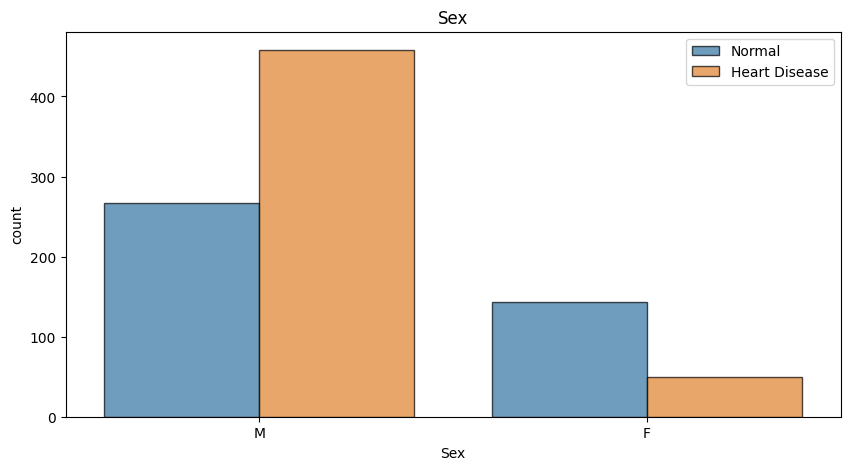

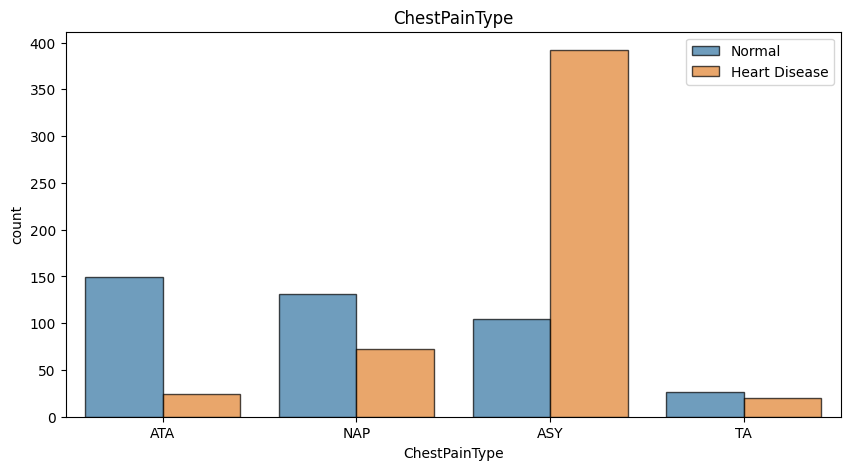

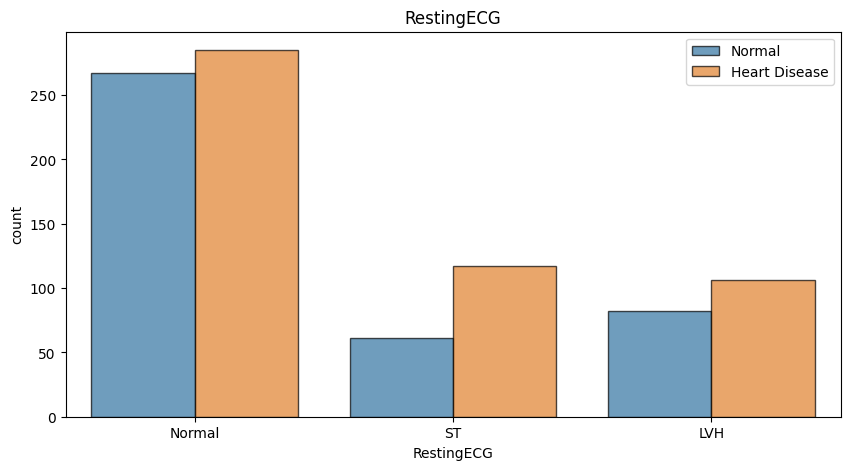

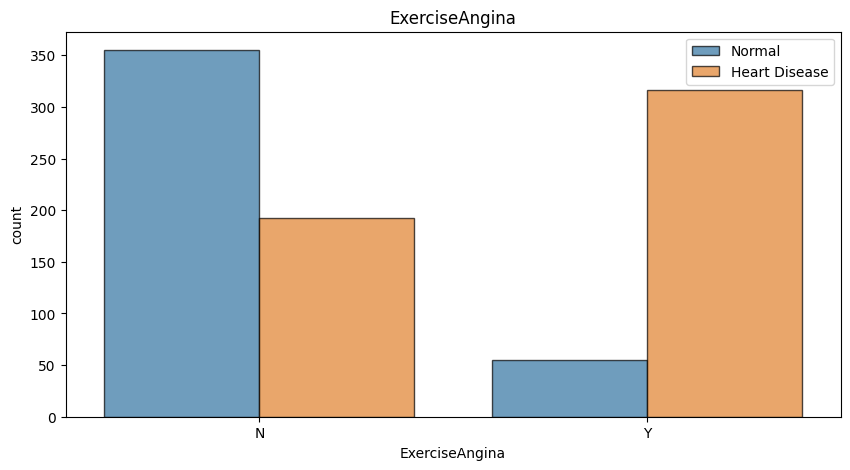

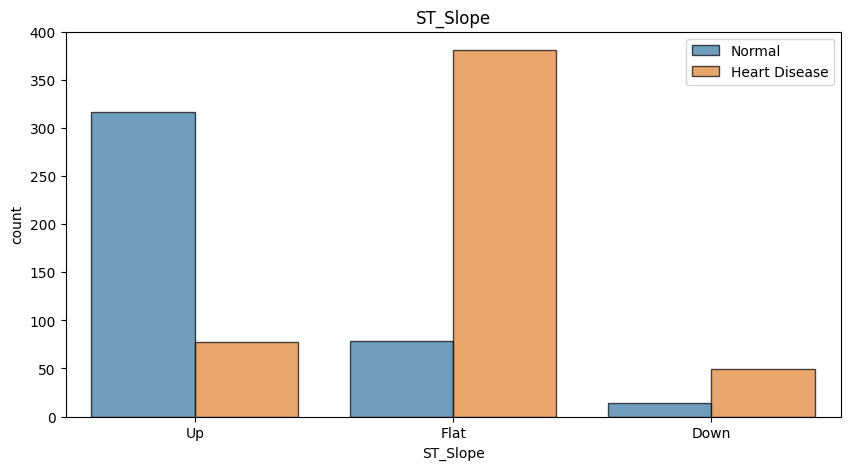

In [7]:
for i in Categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=data, hue='HeartDisease', edgecolor='black', alpha=0.7)
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

**Nhận xét**
*   Nam giới thường được chẩn đoán mắc bệnh tim nhiều hơn
*   Những người không bị đau ngực có thể bị bệnh tim, vì vậy đặc trưng này cung cấp không nhiều thông tin về chẩn đoán
*   Những người bị đau thắt ngực khi gắng sức thường được chẩn đoán mắc bệnh tim cao hơn

**Phân tích những dữ liệu số đối với người mắc bệnh tim và không mắc bệnh tim**

**Biểu đồ phân phối tuổi (age) với bệnh tim (HeartDisease)**

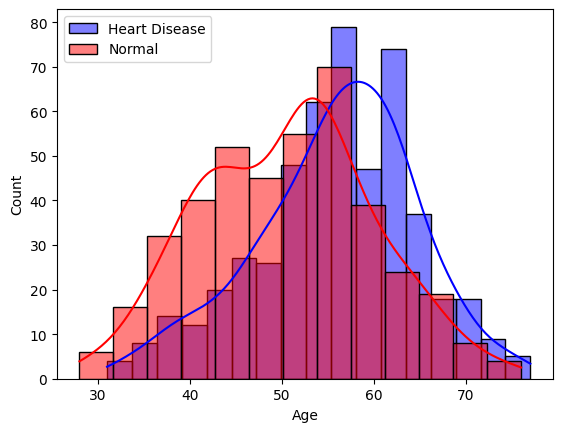

In [8]:
sns.histplot(data['Age'][data['HeartDisease'] == 1], kde=True, color='blue', label='Heart Disease',alpha=0.5)
sns.histplot(data['Age'][data['HeartDisease'] == 0], kde=True, color='red', label='Normal',alpha=0.5)
plt.legend()

**Nhận xét**
*   Biểu đồ phân phối tuổi của những người không mắc bệnh tim có xu hướng lệch trái
*   Biểu đồ phân phối tuổi của những người mắc bệnh tim có xu hướng lệch phải
*   Nhóm tuổi có tỉ lệ mắc bệnh tim cao là từ 50 - 65 tuổi
*   Nhóm tuổi dưới 40 có nguy cơ mắc bênh tim thấp

**Biểu đồ phân phối huyết áp khi nghỉ ngơi (RestingBP) với bệnh tim (HeartDisease)**

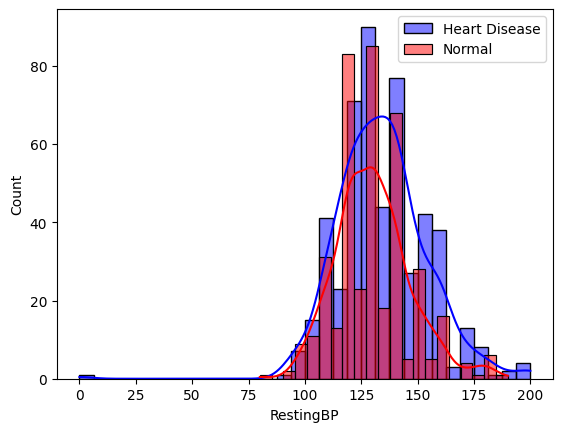

In [8]:
sns.histplot(data['RestingBP'][data['HeartDisease'] == 1], kde=True, color='blue', label='Heart Disease',alpha=0.5)
sns.histplot(data['RestingBP'][data['HeartDisease'] == 0], kde=True, color='red', label='Normal',alpha=0.5)
plt.legend()

**Nhận xét**
*   Đa số mẫu có chỉ số huyết áp lúc nghỉ ngơi từ 120-150
*   Những người có chỉ số huyết áp từ 130-150 có tỉ lệ mắc bệnh tim cao hơn

**Biểu đồ phân phối nồng độ Cholesterol với bệnh tim**

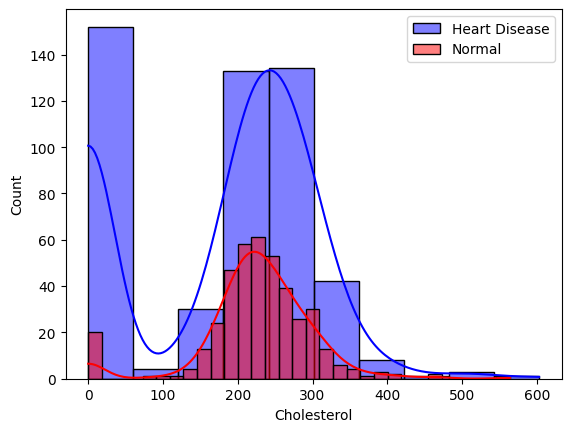

In [9]:
sns.histplot(data['Cholesterol'][data['HeartDisease'] == 1], kde=True, color='blue', label='Heart Disease',alpha=0.5)
sns.histplot(data['Cholesterol'][data['HeartDisease'] == 0], kde=True, color='red', label='Normal',alpha=0.5)
plt.legend()

**Nhận xét**
*   Sai số ở cột màu xanh bên trái cùng do dữ liệu mẫu cung cấp sai (quá nhiều mẫu là 0)
*   Nồng độ Cholesterol của mẫu trải từ 100 - 400 mm/dl
*   Nồng độ Cholesterol có khả năng mắt bệnh tim cao nhất là từ 200-300 mm/dl
*   Ở người bình thường, hàm lượng cholesterol trong máu luôn là hằng định <200 mm/dl, chỉ khi nó tăng quá cao mới gây bệnh, gọi là tăng cholesterol hay là tăng mỡ máu, hiện tượng này gây xơ vữa động mạch, làm hẹp mạch máu và là nguyên nhân chủ yếu của bệnh tim mạch

**Biểu đồ phân phối nhịp tim tối đa (MaxHR) với bệnh tim (HeartDisease)**

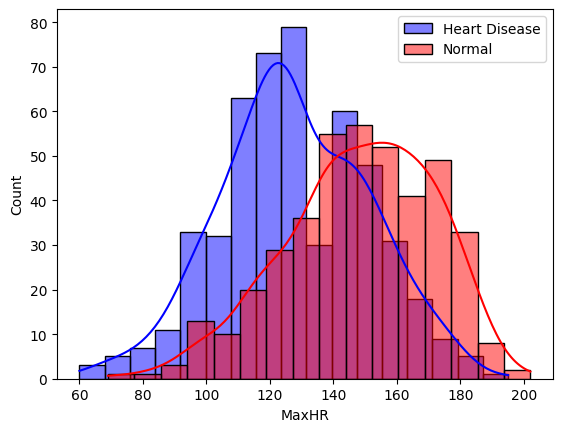

In [9]:
sns.histplot(data['MaxHR'][data['HeartDisease'] == 1], kde=True, color='blue', label='Heart Disease',alpha=0.5)
sns.histplot(data['MaxHR'][data['HeartDisease'] == 0], kde=True, color='red', label='Normal',alpha=0.5)
plt.legend()

**Nhận xét**
*   Biểu đồ phân phối nhịp tim tối đa của người bình thường có xu hướng lệch phải
*   Biểu đồ phân phối nhịp tim tối đa của người mắc bệnh tim có xu hướng lệch trái
*   Giá trị trải từ 60 - 202 lần/phút
*   Đa số những người mắc bệnh tim có giá trị nhịp tim tối đa từ 110 - 150 lần/phút
*   Đa số những người không mắc bệnh tim có giá trị nhịp tim tối đa từ 140 - 180 lần/phút



**Số lượng người mắc bệnh tim và không mắc bệnh tim trong mẫu**

1    508
0    410
Name: HeartDisease, dtype: int64


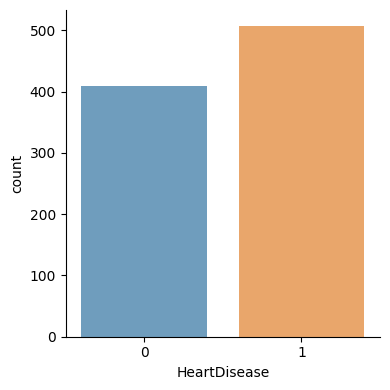

In [10]:
sns.catplot(data=data, x="HeartDisease", kind="count", alpha=.7,  height=4)
print(data['HeartDisease'].value_counts())

**Tính tỉ lệ phần trăm cúa người mắc bệnh tim và không mắc bệnh tim**

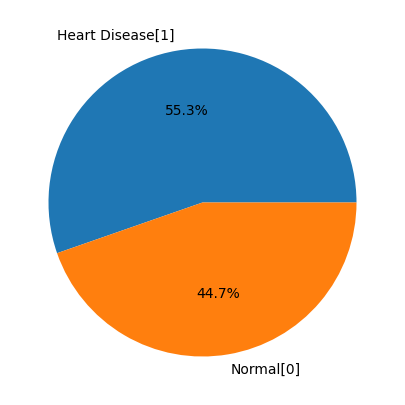

In [11]:
plt.figure(figsize=(10,5))
plt.pie(data['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

**Đồ thị ma trận tương quan**

C:\Users\DANALAP\AppData\Local\Temp\ipykernel_14068\768457462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, alpha=0.7)


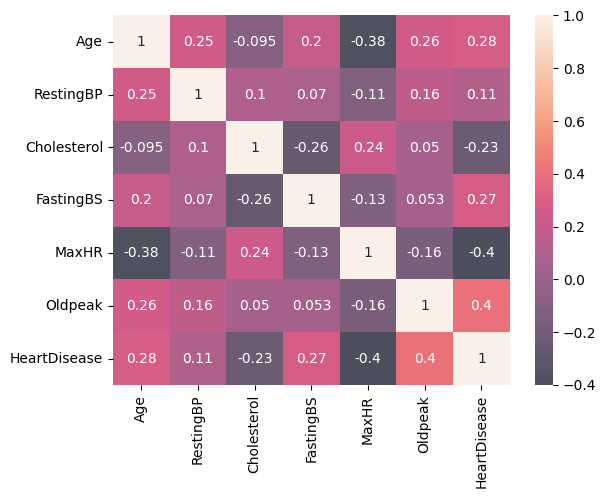

In [12]:
sns.heatmap(data.corr(), annot=True, alpha=0.7)
plt.show()

**Nhận xét**
*   Màu nhạt thể hiện sự tương quan cao, đậm là thấp (từ nhạt xuống đậm là thấp dần)
*   Oldpeak có độ tương quan cao nhất đối với HeartDisease
*   MaxHK có độ tương quan thấp nhất đối với HeartDisease


# *Kết luận*
*   Tuổi tác càng lớn thì nguy cơ mắc bệnh tim mạch càng tăng
*   Những cơn đau thắt ngực không triệu chứng có nguy cơ gây ra bênh tim cao hơn 
*   Nam giới có nguy cơ mắc bệnh tim mạch nhiều hơn nữ giới
*   Việc đau thắt ngực khi gắng sức là 1 dấu hiệu của nguy cơ mắc bệnh tim mạch
*   Nhịp tim tối đa càng thấp thì nguy cơ mắc bệnh tim mạch càng cao
*   Nồng độ cholesterol, và lượng đường trong máu tăng cao trong cơ thể cũng dẫn đến tỉ lệ mắc bệnh tim cao hơn
*   Để chẩn đoán bệnh tim chính xác, cần thực hiện các xét nghiệm y tế, kiểm tra, đánh giá và chẩn đoán từ các chuyên gia y tế. Việc thường xuyên kiểm tra và theo dõi sức khỏe tim mạch của bạn bằng cách đo huyết áp, đo lường đường huyết, đo nồng độ cholesterol và đánh giá tình trạng nhịp tim là cách tốt nhất để phát hiện và điều trị bệnh tim kịp thời.
    